<a href="https://colab.research.google.com/github/CMunoz-28/DataAnalytics/blob/main/Personal.Project.EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Analytics & Statistical Analysis

##Exploratory Data Analysis (EDA) - Retail sales

###Name: Carlos Munoz

###Perform Exploratory Data Analysis on dataset SampleSuperStore
###Dataset: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

##Libraries, Directory, Data

###We begin by importing needed libraries, datasets for our analysis.

In [127]:
%cd /content/drive/MyDrive/Projects/Analytics/Superstore

/content/drive/MyDrive/Projects/Analytics/Superstore


In [128]:
!pip install prophet
!pip install pandas
!pip Install chardet

ERROR: unknown command "Install" - maybe you meant "install"


In [129]:
#Install needed libraries
import pandas as pd
import seaborn as sns
import chardet
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
with open("superstore_dataset.csv", "rb") as f:
    encoding = chardet.detect(f.read())['encoding']
from prophet import Prophet

In [130]:
#Load the data
superstore_df = pd.read_csv("superstore_dataset.csv", encoding = encoding)
superstore_df.head(10)

,Category,City,Country,Customer Name,Order Date,Order ID,Postal Code,Product Name,Region,Segment,...,Days to Ship Actual,Days to Ship Scheduled,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Sales Forecast,Sales per Customer
0,Office Supplies,Houston,United States,Darren Powers,1/4/11,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,...,4,6,0.2,1,$6,33.80%,2,$16,$22,$16.45
1,Office Supplies,Naperville,United States,Phillina Ober,1/5/11,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,...,4,6,0.8,1,($5),-155.00%,2,$4,$5,$3.54
2,Office Supplies,Naperville,United States,Phillina Ober,1/5/11,CA-2011-112326,60540,Avery 508,Central,Home Office,...,4,6,0.2,1,$4,36.30%,3,$12,$15,$11.78
3,Office Supplies,Naperville,United States,Phillina Ober,1/5/11,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,...,4,6,0.2,1,($65),-23.80%,3,$273,$357,$272.74
4,Office Supplies,Philadelphia,United States,Mick Brown,1/6/11,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,...,7,6,0.2,1,$5,25.00%,3,$20,$26,$19.54
5,Office Supplies,Athens,United States,Jack O'Briant,1/7/11,CA-2011-106054,30605,"Dixon Prang Watercolor Pencils, 10-Color Set w...",South,Corporate,...,1,1,0.0,1,$5,41.00%,3,$13,$17,$12.78
6,Office Supplies,Los Angeles,United States,Lycoris Saunders,1/7/11,CA-2011-130813,90049,Xerox 225,West,Consumer,...,2,3,0.0,1,$9,48.00%,3,$19,$25,$19.44
7,Furniture,Henderson,United States,Maria Etezadi,1/7/11,CA-2011-167199,42420,Global Deluxe High-Back Manager's Chair,South,Home Office,...,4,6,0.0,1,$746,29.00%,9,"$2,574","$3,373","$2,573.82"
8,Office Supplies,Henderson,United States,Maria Etezadi,1/7/11,CA-2011-167199,42420,Rogers Handheld Barrel Pencil Sharpener,South,Home Office,...,4,6,0.0,1,$1,27.00%,2,$5,$7,$5.48
9,Office Supplies,Henderson,United States,Maria Etezadi,1/7/11,CA-2011-167199,42420,Ibico Hi-Tech Manual Binding System,South,Home Office,...,4,6,0.0,1,$274,45.00%,2,$610,$799,$609.98


#Drops Columns

In [131]:
superstore_df = superstore_df.drop(columns = ['Postal Code'])
superstore_df.head()

,Category,City,Country,Customer Name,Order Date,Order ID,Product Name,Region,Segment,Ship Date,...,Days to Ship Actual,Days to Ship Scheduled,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Sales Forecast,Sales per Customer
0,Office Supplies,Houston,United States,Darren Powers,1/4/11,CA-2011-103800,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,1/8/11,...,4,6,0.2,1,$6,33.80%,2,$16,$22,$16.45
1,Office Supplies,Naperville,United States,Phillina Ober,1/5/11,CA-2011-112326,GBC Standard Plastic Binding Systems Combs,Central,Home Office,1/9/11,...,4,6,0.8,1,($5),-155.00%,2,$4,$5,$3.54
2,Office Supplies,Naperville,United States,Phillina Ober,1/5/11,CA-2011-112326,Avery 508,Central,Home Office,1/9/11,...,4,6,0.2,1,$4,36.30%,3,$12,$15,$11.78
3,Office Supplies,Naperville,United States,Phillina Ober,1/5/11,CA-2011-112326,SAFCO Boltless Steel Shelving,Central,Home Office,1/9/11,...,4,6,0.2,1,($65),-23.80%,3,$273,$357,$272.74
4,Office Supplies,Philadelphia,United States,Mick Brown,1/6/11,CA-2011-141817,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,1/13/11,...,7,6,0.2,1,$5,25.00%,3,$20,$26,$19.54


In [132]:
superstore_df.tail()

,Category,City,Country,Customer Name,Order Date,Order ID,Product Name,Region,Segment,Ship Date,...,Days to Ship Actual,Days to Ship Scheduled,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Sales Forecast,Sales per Customer
9989,Office Supplies,Loveland,United States,Jill Matthias,12/31/14,CA-2014-156720,Bagged Rubber Bands,West,Consumer,1/4/15,...,4,6,0.2,1,($1),-20.00%,3,$3,$4,$3.02
9990,Office Supplies,Fairfield,United States,Erica Bern,12/31/14,CA-2014-115427,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",West,Corporate,1/4/15,...,4,6,0.2,1,$5,32.50%,2,$14,$18,$13.90
9991,Office Supplies,Fairfield,United States,Erica Bern,12/31/14,CA-2014-115427,GBC Binding covers,West,Corporate,1/4/15,...,4,6,0.2,1,$6,31.30%,2,$21,$27,$20.72
9992,Technology,New York City,United States,Patrick O'Donnell,12/31/14,CA-2014-143259,Gear Head AU3700S Headset,East,Consumer,1/4/15,...,4,6,0.0,1,$3,3.00%,7,$91,$119,$90.93
9993,Office Supplies,Columbus,United States,Chuck Clark,12/31/14,CA-2014-126221,Eureka The Boss Plus 12-Amp Hard Box Upright V...,Central,Home Office,1/6/15,...,6,6,0.0,1,$57,27.00%,2,$209,$274,$209.30


In [133]:
superstore_df.count()

Category                  9994
City                      9994
Country                   9994
Customer Name             9994
Order Date                9994
Order ID                  9994
Product Name              9994
Region                    9994
Segment                   9994
Ship Date                 9994
Ship Mode                 9994
State                     9994
Sub-Category              9994
Days to Ship Actual       9994
Days to Ship Scheduled    9994
Discount                  9994
Number of Records         9994
Profit                    9994
Profit Ratio              9994
Quantity                  9994
Sales                     9994
Sales Forecast            9994
Sales per Customer        9994
dtype: int64

In [134]:
superstore_df.shape

(9994, 23)

In [135]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                9994 non-null   object 
 1   City                    9994 non-null   object 
 2   Country                 9994 non-null   object 
 3   Customer Name           9994 non-null   object 
 4   Order Date              9994 non-null   object 
 5   Order ID                9994 non-null   object 
 6   Product Name            9994 non-null   object 
 7   Region                  9994 non-null   object 
 8   Segment                 9994 non-null   object 
 9   Ship Date               9994 non-null   object 
 10  Ship Mode               9994 non-null   object 
 11  State                   9994 non-null   object 
 12  Sub-Category            9994 non-null   object 
 13  Days to Ship Actual     9994 non-null   int64  
 14  Days to Ship Scheduled  9994 non-null   

In [136]:
superstore_df.isnull().sum()

Category                  0
City                      0
Country                   0
Customer Name             0
Order Date                0
Order ID                  0
Product Name              0
Region                    0
Segment                   0
Ship Date                 0
Ship Mode                 0
State                     0
Sub-Category              0
Days to Ship Actual       0
Days to Ship Scheduled    0
Discount                  0
Number of Records         0
Profit                    0
Profit Ratio              0
Quantity                  0
Sales                     0
Sales Forecast            0
Sales per Customer        0
dtype: int64

There are no null values over entire data.

##Check for missing data

In [137]:
superstore_df.isnull().sum()

Category                  0
City                      0
Country                   0
Customer Name             0
Order Date                0
Order ID                  0
Product Name              0
Region                    0
Segment                   0
Ship Date                 0
Ship Mode                 0
State                     0
Sub-Category              0
Days to Ship Actual       0
Days to Ship Scheduled    0
Discount                  0
Number of Records         0
Profit                    0
Profit Ratio              0
Quantity                  0
Sales                     0
Sales Forecast            0
Sales per Customer        0
dtype: int64

No missing data.

##Describe the data

In [138]:
superstore_df.describe()

,Days to Ship Actual,Days to Ship Scheduled,Discount,Number of Records,Quantity
count,9994.000000,9994.000000,9994.000000,9994.0,9994.000000
mean,3.958875,4.320692,0.156203,1.0,3.789574
std,1.747097,2.176059,0.206452,0.0,2.225110
min,0.000000,0.000000,0.000000,1.0,1.000000
25%,3.000000,3.000000,0.000000,1.0,2.000000
50%,4.000000,6.000000,0.200000,1.0,3.000000
75%,5.000000,6.000000,0.200000,1.0,5.000000
max,7.000000,6.000000,0.800000,1.0,14.000000


In [139]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                9994 non-null   object 
 1   City                    9994 non-null   object 
 2   Country                 9994 non-null   object 
 3   Customer Name           9994 non-null   object 
 4   Order Date              9994 non-null   object 
 5   Order ID                9994 non-null   object 
 6   Product Name            9994 non-null   object 
 7   Region                  9994 non-null   object 
 8   Segment                 9994 non-null   object 
 9   Ship Date               9994 non-null   object 
 10  Ship Mode               9994 non-null   object 
 11  State                   9994 non-null   object 
 12  Sub-Category            9994 non-null   object 
 13  Days to Ship Actual     9994 non-null   int64  
 14  Days to Ship Scheduled  9994 non-null   

In [140]:
superstore_df.dtypes

Category                   object
City                       object
Country                    object
Customer Name              object
Order Date                 object
Order ID                   object
Product Name               object
Region                     object
Segment                    object
Ship Date                  object
Ship Mode                  object
State                      object
Sub-Category               object
Days to Ship Actual         int64
Days to Ship Scheduled      int64
Discount                  float64
Number of Records           int64
Profit                     object
Profit Ratio               object
Quantity                    int64
Sales                      object
Sales Forecast             object
Sales per Customer         object
dtype: object

#Outliers

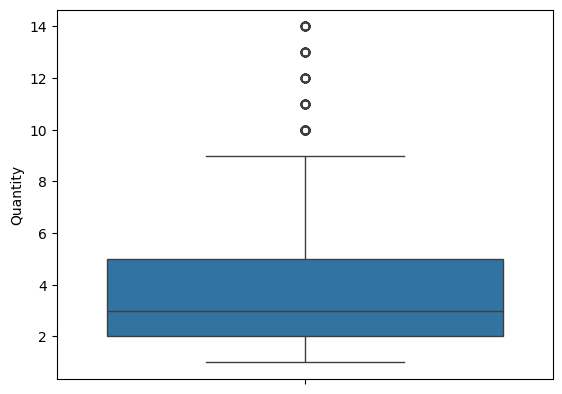

In [141]:
sns.boxplot(data = superstore_df['Quantity'])
plt.show()

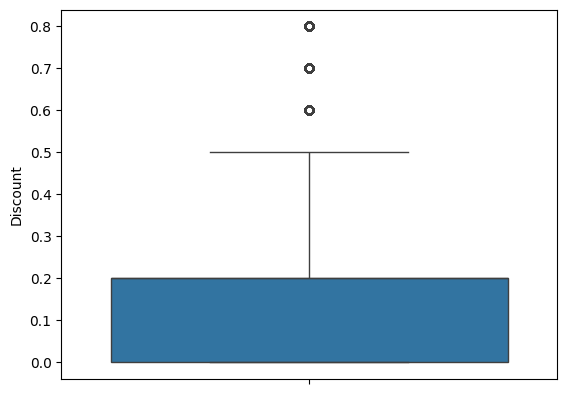

In [142]:
sns.boxplot(data = superstore_df['Discount'])
plt.show()

Managing Outliers

In [143]:
numeric_cols = superstore_df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    superstore_df[col] = pd.to_numeric(superstore_df[col], errors='coerce')

Q1 = superstore_df.quantile(0.25)
Q3 = superstore_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Category                  NaN
City                      NaN
Country                   NaN
Customer Name             NaN
Order Date                NaN
Order ID                  NaN
Product Name              NaN
Region                    NaN
Segment                   NaN
Ship Date                 NaN
Ship Mode                 NaN
State                     NaN
Sub-Category              NaN
Days to Ship Actual       2.0
Days to Ship Scheduled    3.0
Discount                  0.2
Number of Records         0.0
Profit                    NaN
Profit Ratio              NaN
Quantity                  3.0
Sales                     NaN
Sales Forecast            NaN
Sales per Customer        NaN
dtype: float64


In [144]:
superstore_df = superstore_df[~((superstore_df < (Q1 - 1.5 * IQR)) | (superstore_df > (Q3 + 1.5 * IQR))).any(axis = 1)]
superstore_df.shape

(8980, 23)

#Correlations

In [145]:
superstore_df.corr()

,Category,City,Country,Customer Name,Order Date,Order ID,Product Name,Region,Segment,Ship Date,...,Days to Ship Actual,Days to Ship Scheduled,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Sales Forecast,Sales per Customer
Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


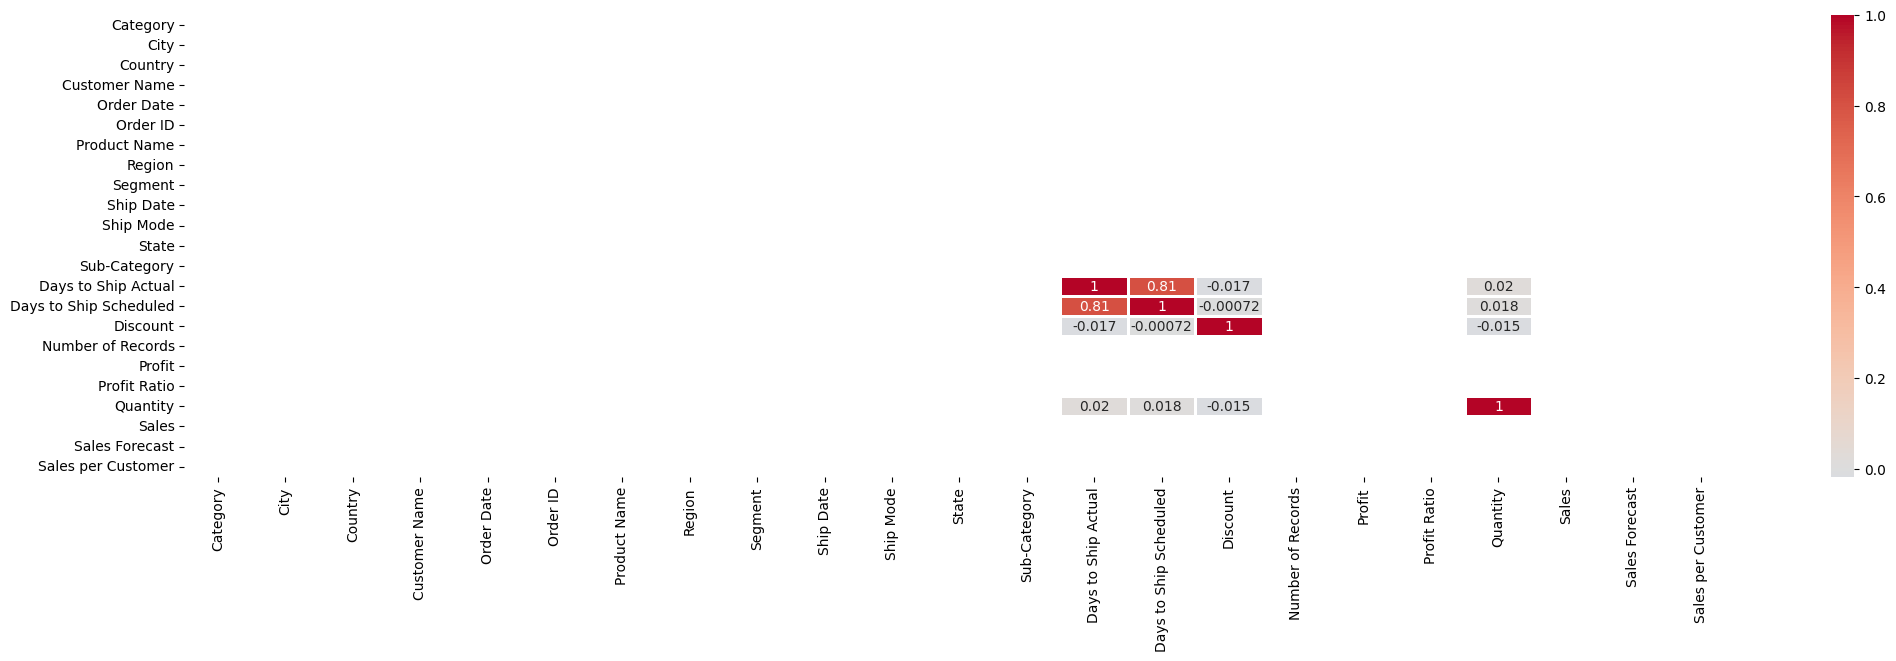

In [146]:
#Heatmap
plt.figure(figsize=(25,6))
sns.heatmap(superstore_df.corr(),
            annot=True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,)
plt.show()